In [1]:
import skbio
from skbio import TreeNode, DistanceMatrix, Alignment
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
aln = Alignment.read("../data/all_genomes.fasta")

In [3]:
dist = aln.distances()

In [4]:
samp = skbio.read("../data/sample.nwk", into=TreeNode)

In [5]:
tdist = samp.tip_tip_distances()

In [6]:
num_runs = 2
runs = DistanceMatrix(
    np.repeat(np.repeat(dist.data,num_runs, axis=1), num_runs, axis=0))
runs.ids = ['{}-{}'.format(g, i) for g in dist.ids for i in range(num_runs)]
runs.write("../data/runs.dist")

'../data/runs.dist'

In [7]:
truth = runs.condensed_form()

In [8]:
truth

array([ 0.        ,  0.00431074,  0.00431074, ...,  0.01181359,
        0.01181359,  0.        ])

In [22]:
kwip_mat = DistanceMatrix.read("../data/kwip/5x-wip.dist")

In [23]:
ip_mat = DistanceMatrix.read("../data/kwip/5x-ip.dist")

In [24]:
wip = kwip_mat.condensed_form()
ip = ip_mat.condensed_form()

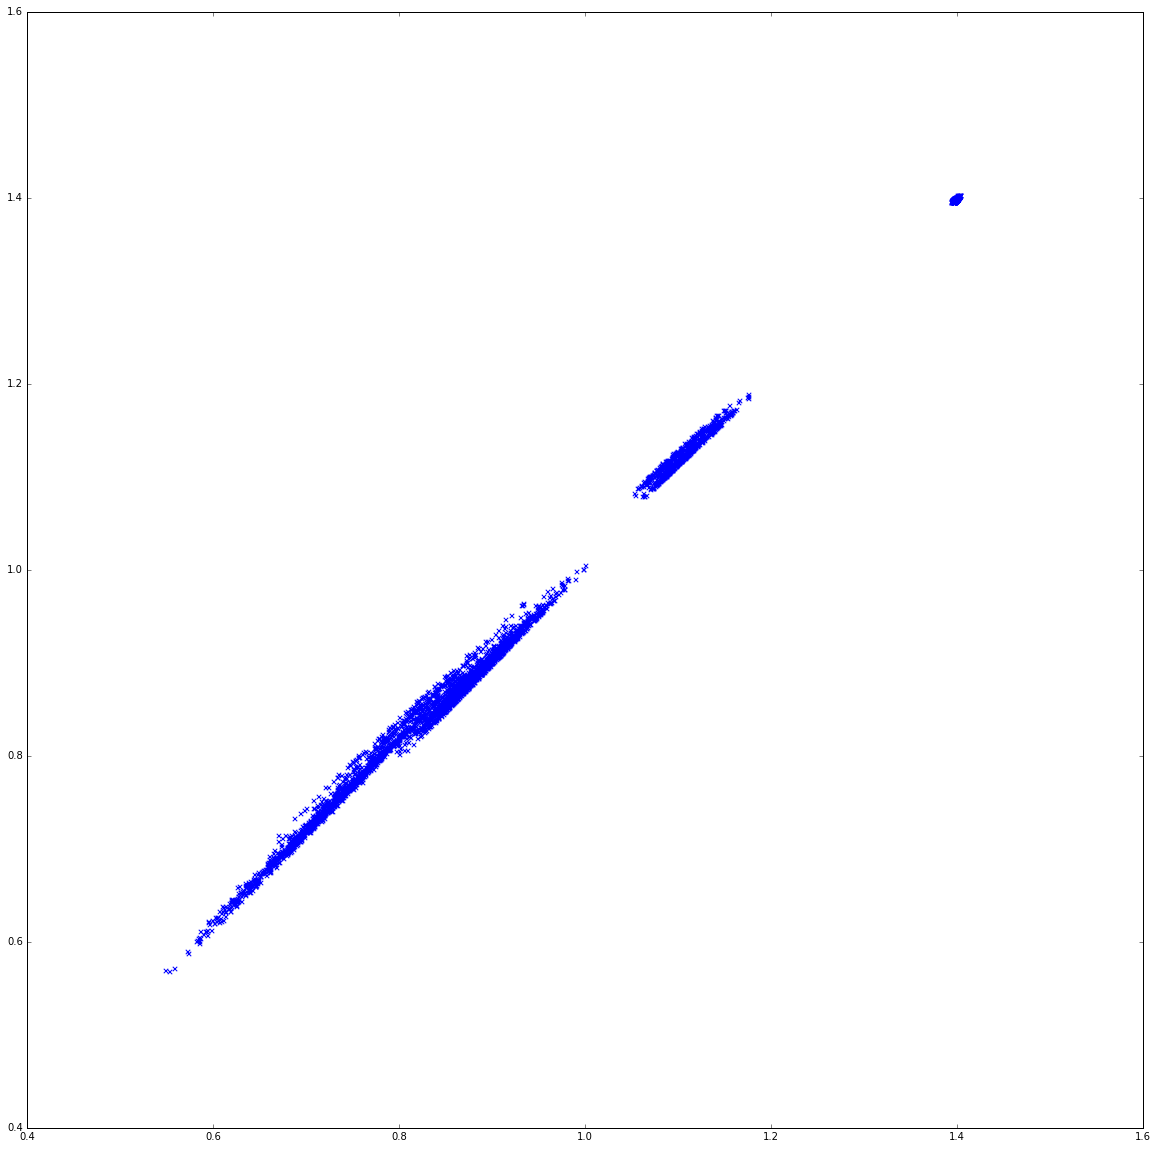

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(wip, ip, marker='x')

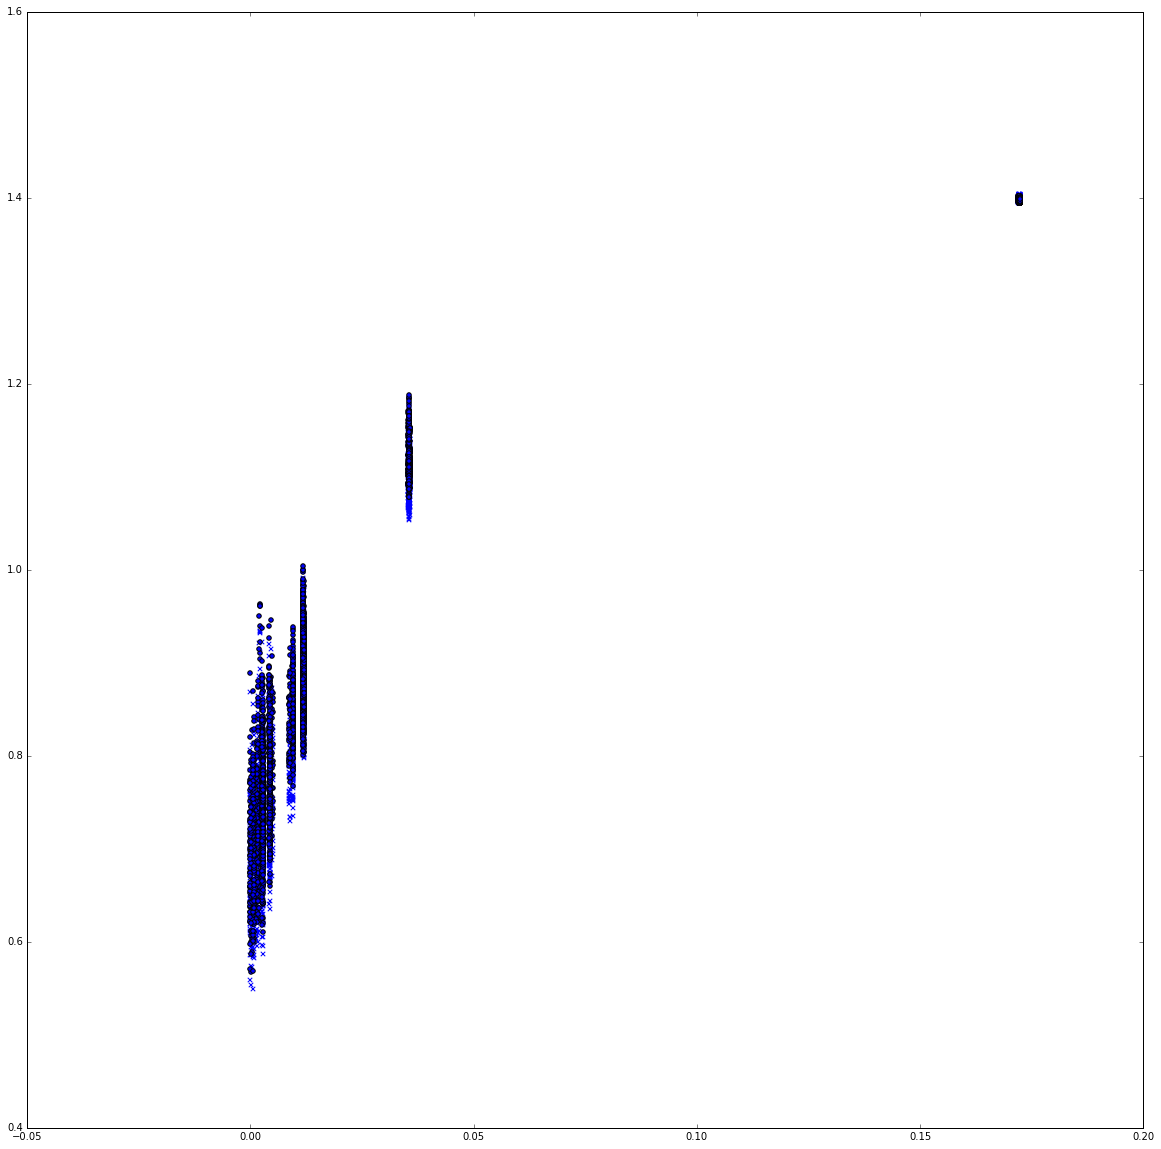

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(truth, wip, marker='x')
ax.scatter(truth, ip, marker='o')

In [27]:
np.log1p(truth)

array([ 0.        ,  0.00430148,  0.00430148, ...,  0.01174435,
        0.01174435,  0.        ])

In [31]:
x = sm.add_constant(np.log2(truth + 1))
r = sm.OLS(wip, x)

f = r.fit()
f.ssr

39.479394933887377

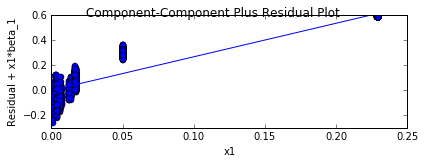

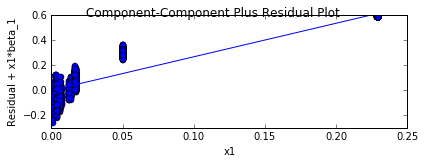

In [29]:
sm.graphics.plot_ccpr_grid(f)